In [82]:
import osmnx as ox

import pandas as pd 

import networkx as nx

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import pickle
set_matplotlib_formats('retina')
from sklearn.preprocessing import MinMaxScaler
import copy

In [ ]:
New York
Chigago
LA 
Austin
SF 
Seattle
Houston
Mami
Las Vegas
Detroid

In [269]:
ny = (40.7428,-73.9928)
chi = (41.8807,-87.6309)
la = (34.0090,-118.4499)
au = (30.2661,-97.7208)
sf = (37.7625,-122.4355)
seat = (47.6109,-122.3403)
hu = (29.7461,-95.3990)
ma = (25.8002,-80.2135)
lv = (36.1588,-115.1431)
de = (42.3443,-83.0795)
#cph = (55.6867243, 12.5700724)

G = ox.graph_from_point(de, distance=500, network_type='drive')

In [270]:
#G = ox.graph_from_place('Manhattan Island, New York City, New York, USA', network_type='drive')

In [271]:
len(G)

103

In [272]:
G_self = copy.deepcopy(G)

In [273]:
for e in G_self.edges:
    if e[0] == e[1]:
        G.remove_edge(e[0], e[1])

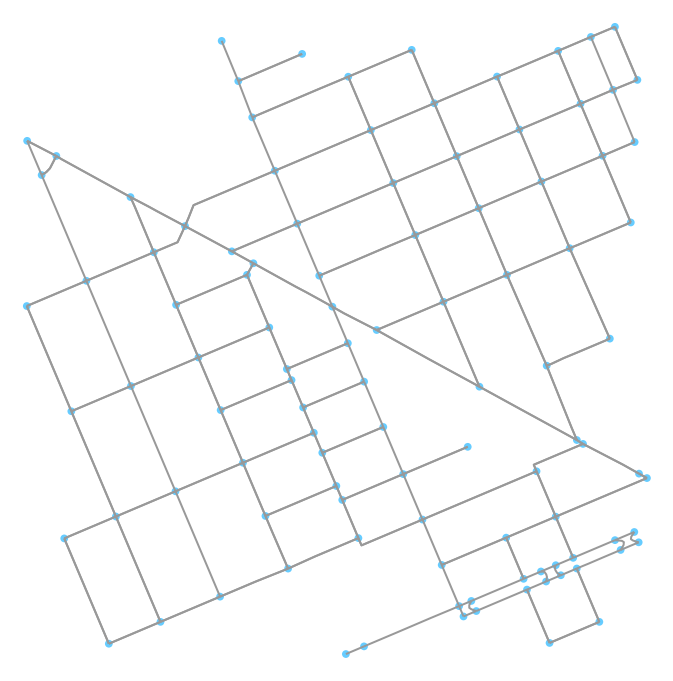

(<Figure size 577.872x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e515782cc8>)

In [274]:
ox.plot_graph(G)

In [275]:
G = nx.Graph(G)

In [276]:
def min_max_graph(G):
    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()

    x = np.array(list(G.nodes(data="x")))
    x = x[:,1].reshape(-1, 1)   

    y = np.array(list(G.nodes(data="y")))
    y = y[:,1].reshape(-1, 1)

    x_scaler.fit(x)
    y_scaler.fit(y)

    for i, n in enumerate(G.nodes):
        x = G.nodes(data=True)[n]["x"]
        y = G.nodes(data=True)[n]["y"]

        x = np.array(x)
        y = np.array(y)

        G.nodes(data=True)[n]["x"] = x_scaler.transform(x.reshape(1, -1))[0][0]
        G.nodes(data=True)[n]["y"] = y_scaler.transform(y.reshape(1, -1))[0][0]

    return G

In [277]:
G = min_max_graph(G)

In [278]:
def rotate_graph(G, degrees=0, point= 'in_place'):
    """
    Rotates a networkx graph object around a point with a given angle in degrees
    Rotates clockwise around the specified point, if nothing is given, rotate in place.
    Returns a new networkX graph with the rotated object
    """
    points = []
    dic = copy.deepcopy( dict(G.nodes(data=True)) )
    for key in dic:  
        points.append((dic[key]['x'],dic[key]['y']))

    if point == 'in_place':
        point = ( sum(d['x'] for d in dic.values() if d) / len(dic.keys()), sum(d['y'] for d in dic.values() if d) / len(dic.keys())  )
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(point)
    p = np.atleast_2d(points)
    new_points = np.squeeze((R @ (p.T-o.T) + o.T).T)
    for i, key in enumerate(dic):  
        dic[key]['x'] = round(new_points[i][0])
        dic[key]['y'] = round(new_points[i][1])
    H = copy.deepcopy(G)
    nx.set_node_attributes(H,dic)
    return H

In [279]:
import os 
os.chdir(r"C:\Users\olive\OneDrive\Dokumenter\GitHub\GRAN\data\us_cities")

In [280]:
def save_graphs(graph, num_graphs):
    for i in range(num_graphs):
        G = graph
        with open(f'train_de_{i}.pickle', 'wb') as handle:
            pickle.dump(G, handle)
            
save_graphs(G, 3)

In [254]:
G.nodes(data=True)

NodeDataView({99149830: {'y': 0.2921053539989771, 'x': 0.9330077263257408, 'osmid': 99149830}, 99149836: {'y': 0.3445637290437844, 'x': 0.9327306867508014, 'osmid': 99149836}, 99149838: {'y': 0.45258724843824893, 'x': 0.9299705517187249, 'osmid': 99149838}, 99149840: {'y': 0.5574464657624958, 'x': 0.9278773638143321, 'osmid': 99149840}, 99149842: {'y': 0.769247586500569, 'x': 0.9196790445203078, 'osmid': 99149842}, 99149844: {'y': 0.8755911491593906, 'x': 0.9161185729390127, 'osmid': 99149844}, 99149846: {'y': 0.9785517852419616, 'x': 0.9123528868549329, 'osmid': 99149846}, 99162150: {'y': 0.01910087795022264, 'x': 0.7343806113349274, 'osmid': 99162150}, 99162152: {'y': 0.013531706306821434, 'x': 0.6309319816537027, 'osmid': 99162152}, 99162153: {'y': 0.011460526769951684, 'x': 0.5270934444233717, 'osmid': 99162153}, 2914797693: {'y': 0.008963604772816325, 'x': 0.30538995885399345, 'osmid': 2914797693}, 2914797694: {'y': 0.10714902136805904, 'x': 0.3029273848496814, 'osmid': 2914797694

In [126]:
def get_pos(G):
    
    nodes = G.nodes
    
    pos = {}
    
    for n in nodes:
        pos[n] = [G.nodes(data=True)[n]["x"], G.nodes(data=True)[n]["y"]]
        
    return pos

pos = get_pos(G)

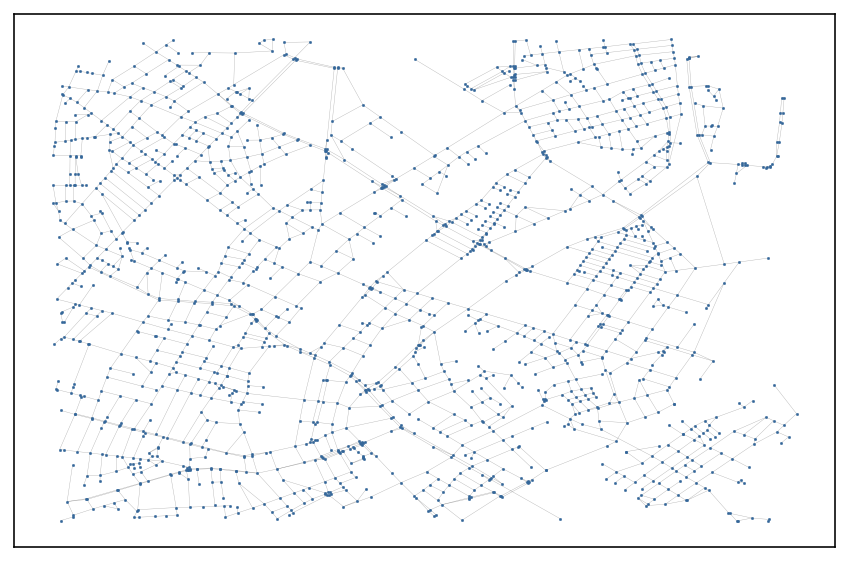

In [130]:
nx.draw_networkx_nodes(
    G,
    pos,
    node_size=1.5,
    node_color='#336699',
    alpha=1,
    linewidths=0.2,
    font_size=1.5
    )
nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.2)

plt.draw()
# plt.xlim(x_min-1, x_max+1)
# plt.ylim(y_min-1, y_max+1)
plt.tight_layout()
plt.show()